# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 4б

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **3 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'


#Теоретическая часть

Бутстреп:

1. 5 баллов Пусть $X_1, ..., X_n$  &mdash; некоторая выборка и $X_1^*, ..., X_n^*$ --- построенная по ней бутстрепная выборка. С какой вероятностью элемент $X_i$ исходной выборки попадет в бутстрепную выборку? К чему стремится эта вероятность с ростом размера выборки? Посчитайте среднее число уникальных элементов в бутстрепной выборке, если в исходной выборке все наблюдения различны.
	
2. \* (**бонус**, на подумать, доп баллы) Пусть $X_1, ..., X_n$ &mdash; выборка из равномерного распределения на отрезке $[0, \theta]$ и

 $\widehat{\theta}~=~X_{(n)}$ &mdash; оценка параметра $\theta$. Имеет ли смысл применять метод бутстрепа для оценки распределения $\widehat{\theta}$?

Проверка гипотез:


3. 5 баллов Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(\theta,1)$. Постройте РНМК уровня значимости $\alpha$ проверки

	a). $\mathrm{H}_0\colon \theta\geqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta<\theta_0$; 

  b). $\mathrm{H}_0\colon \theta\leqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta>\theta_0$.

	В каждом случае найдите мощность критерия.  Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.

4. 5 баллов Кот Василий (на фото слева) решил вывести правило, по которому можно отличать песиков от единорогов. Известно, что рост песиков имеет распределение $\Gamma(6/7, 2)$, а рост единорогов &mdash; распределение $\Gamma(5/44, 3)$. На основе роста животного $X$, кот Василий построил наиболее мощные критерии для проверки гипотез песик vs. единорог и единорог vs. песик. Какой ответ получит кот Василий для существа (на фото справа), рост которого составляет 6.66? Каковы мощности критериев? В ответе должно быть число. Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.

 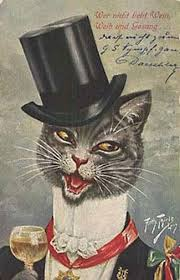
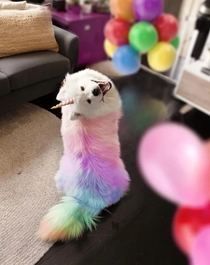


# Практическая часть


### Задача 5. 

15 баллов

Часто в физике и биологии встречаются выборки малого размера. В этом случае асимптотический доверительный интервал может давать не очень корректный ответ. Можно воспользоваться обычными доверительными интервалами или бутстрепом. Иногда обычные доверительные интервалы мы строить не умеем.

Посмотрим, насколько хорошо работают эти методы на маленькой выборке.


**1).** Рассмотрим модель $X_1, \ldots X_n \sim Exp(\theta)$.

Как мы знаем из теоретической части, эта модель хорошо описывает данные о разнице между соседними событиями, такими как появление фотона на детекторе или поломки различных систем.

В качестве оценки $\widehat \theta$ будем рассматривать $\frac{1}{\overline X}$.

Выпишите формулы для 

- а). Точного доверительного интервала для $\theta$;

- б). Асимптотического доверительного интервала для $\theta$;

  *Лайфхак: $Exp(\theta) = Gamma(\theta, 1)$, далее см. теор. дз.*

- в) Нормального бутстрепного интервала с использованием $\widehat \theta$;

- г) Центрального бутстрепного интервала с использованием $\widehat \theta$;

- д) Квантильного бутстрепного интервала с использованием $\widehat \theta$.



Ответ: 

Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку, количество бутстрепных выборок $B$ и может принимать дополнительные параметры для вашего удобства. 

In [14]:
from random import randint

def bootstrap(sample, B=6):
    sample = sps.expon.rvs(size=30)
    size = len(sample)
    a = np.zeros(size)
    
    sample_of_thetas = np.zeros(B)
    
    for i in range(B):
      if i == 0:
        a[i] = 1. / (np.sum(sample) / size)
      else:
        for j in range(size):
            a[j] = sample[randint(0, size - 1)]
        theta = np.sum(a) / size  
        sample_of_thetas[i] = 1. / theta
    
    return sample_of_thetas

Реализуйте вышеупомянутые доверительные интервалы в виде функций, принимающих на вход выборку и  выборку оценок, полученных с помощью бутстрепа. Функции могут принимать дополнительные параметры для вашего удобства. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. Обычный и асимптотический доверительный интервалы лучше также реализовать для всех подвыборок размера от 1 до n, как в предыдущем задании, так как это понадобится дальше.


В данной задаче полагайте $\alpha = 0.9$ (для наглядности).

Сгенерируйте реализации выборки из  $Exp(5)$ размеров 5 и  100 и выведите реализации вышеупомянутых доверительных интервалов для этих двух реализаций. Сделайте **выводы**.

*Обратите внимание на то, как задаются параметры экспоненциального распределеня в `scipy`.*

In [17]:
import math

alpha = 0.9

def exact_intr(sample):
    quant1 = sps.gamma(a=1, scale=1 / 5).ppf((1 + alpha) / 2)
    quant2 = sps.gamma(a=1, scale=1 / 5).ppf((1 - alpha) / 2)
    
    sample_sum = np.sum(sample)
    
    lef1 = quant2 / sample_sum
    lef2 = quant1 / sample_sum

    return (lef1, lef2)

def asymptotical_intr(sample):
    theta = 1 / (np.sum(sample))
    sample_len = len(sample)

    quant1 = sps.gamma(a=1, scale=1 / 5).ppf((1 + alpha) / 2)
    quant2 = sps.gamma(a=1, scale=1 / 5).ppf((1 - alpha) / 2)

    left = theta - (quant1 * (theta ** 2)) / np.sqrt(sample_len)
    right = theta - (quant2 * (theta ** 2))  / np.sqrt(sample_len)

    return (left, right)


def normal_bst(sample, sample_of_thetas):
    variance = sample_of_thetas.var()
    theta = 1 / (np.sum(sample) / len(sample))
    
    quant = sps.norm.ppf((1 + alpha) / 2) * np.sqrt(variance)
    quant1 = theta - quant
    quant2 = theta + quant
    
    return (quant1, quant2)


def quant_bst(sample, sample_of_thetas):
    sample_len = len(sample_of_thetas)
    quant1 = np.sort(sample_of_thetas)[math.ceil(sample_len * (1 - alpha) / 2)]
    qaunt2 = np.sort(sample_of_thetas)[math.floor(sample_len * (1 + alpha) / 2)]

    return (quant1, qaunt2) 

Теперь оценим, каков реальный уровень доверия этих доверительных интервалов при маленьком размере выборки. Для этого сгенерируйте 300 выборок размера 5 из $Exp(5)$. 

По каждой выборке посчитайте выборку оценок методом бутстрепа с $B = 300$. Посчитайте реализации всех доверительных интервалов, а также, какова доля реализаций выборок, для которых истинное значение параметра ($5$) попадает в реализацию доверительнго интервала (для каждого типа интервала в отдельности).

 Какой должна быть эта доля у доверительного интервала согласно определению? Выведите получившиеся доли для всех типов интервалов.

*Предупреждение: код может работать долго, особенно при неоптимальной реализации.*

Сделайте **выводы**.

In [22]:
n, k, B = 5, 300, 300

samples = np.array([sps.gamma(a=1, scale=1 / 5).rvs(size=n) for i in range(k)])

In [33]:
bootstrap_samples = np.zeros((300, 300))

for i in range(300):
    bootstrap_samples[i] = bootstrap(samples[i], B)

In [34]:
def part(sample, sample_of_thetas, function):
    a, k, b = 0, 0, 0
    
    for i in range(300):
        a, b = function(sample[i], sample_of_thetas[i])
        if (a < 5) and (b > 5): 
            k += 1

    return np.round(k / 300, 5)  

def part_not_bootstrap(sample, function):
    a, k, b = 0, 0, 0
    
    for i in range(300):
        a, b = function(sample[i])
        if (a < 5) and (b > 5): 
            k += 1

    return np.round(k / 300, 5)  

Доля для нормального бутстрепного интервала

In [36]:
part(samples, bootstrap_samples, normal_bst)  

0.09333

Доля для квантильного бутстрепного интервала

In [38]:
part(samples, bootstrap_samples, quant_bst)  

0.0

In [32]:
part_not_bootstrap(samples, asymptotical_intr)

0.00333

Проведите аналогичное исследование для обычного и асимптотичского доверительного интервалов при длине выборки $n = 100$. Сделайте **выводы**.

Теперь постройте графики зависимости обычного доверительного интервала и асимптотического доверительного интервала от $n$ (от 1 до 300) аналогично предыдущей задаче. Следите за читабельностью графиков, пользуйтесь `ylim`.


Помогли ли графики лучше понять произошедшее ранее?

Сделайте **выводы** по всей задаче.

In [ ]:
<...>

**2)** Бонусная часть

Проведите все те же исследования для модели $N(\theta, 1)$, которая описывает многие физические эксперименты. Есть ли различия? Как вы можете их объяснить? Сделайте **выводы**.

In [ ]:
<...>

### Задача 6.

12 баллов



Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

Известно, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. Это получается аналогично [примеру](https://wiki.yandex.ru/homepage/phystechdatascience-chast-1/vesna-2021/.files/examplernmk-1.pdf), разобранному на wiki. 

Чему при этом равно $c_\alpha$? Как определить p-value?

<...>

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$. Для этого сгенерируйте разные реализации выборок и посчитайте по ним реализации статистики.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [ ]:
<...>

Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 

<...>

Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 -- отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [ ]:
<...>

**Вывод:**

<...>

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05. По оси $x$ должно быть значение $p$, по оси $y$ &mdash; значение мощности критерия при данном параметре. Мощность считается аналитически, аналогично примеру на wiki. Обратите внимание, что текущая задача немного отличается от примера. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

In [ ]:
<...>

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.

In [ ]:
<...>

**Вывод:**

<...>